# **Statistical Analysis and Comparison of Winning Nations in Football Matches Around the World**

### **Abstract**

In this part I will tackle and analyze the following points along with the interpretation behind them: The probability of winning, losing, and drawing along with their confidence intervals of all matches in the dataset; probability of winning, losing, and drawing in a neutral venue of all matches in the dataset; probability of winning, losing, and drawing in a non-neutral venue of all matches in the dataset; the probability of Egypt winning in all tournaments under all conditions; the probability of Egypt winning, Losing, and having a draw in The FIFA World cup qualifications; the probability of Egypt winning a match in The FIFA World cup qualifications; the probability of Egypt Losing a match in The FIFA World cup qualifications; the probability of Egypt drawing a match in The FIFA World cup qualifications; the probability of Egypt winning in all tournaments vs. in World Cup Qualifications; the probability of Egypt Winning, Losing, having a draw in a Friendly match vs. an Offical match; the confidence Interval of Probability of Egypt Winning a Friendly Match; the Confidence Interval of Probability of Egypt Winning an Official Match; the Confidence Interval of Probability of Egypt Winning a Friendly Match vs an Official Match; the Probability of Egypt Winning at Home vs Winning Away; the Probability of Egypt Winning at Home; the Probability of Egypt Winning Away; the Confidence Interval of Probability of Egypt Winning at home vs away; and the probability of Egypt Winning, Losing, and Drawing a match in Non-Neutral Conditions.

### **Discussion**

In [2250]:
import pandas as pd

In [2251]:
import numpy as np

In [2252]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [2253]:
df=pd.read_csv('results.csv')

#### Imports the data set into the workspace

In [2254]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43183,2/1/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False
43184,2/2/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True
43185,2/3/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False
43186,2/5/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False


In [2255]:
x=df['home_score']-df['away_score']

In [2256]:
x[0:3]

0    0
1    2
2    1
dtype: int64

In [2257]:
conditions=[(x<0),(x>0),(x==0)]

In [2258]:
values=['lose','win','draw']

#### This code subtracts the away score from the home score and assigns the result to the variable x. Next, it assigns 3 conditions to 3 statuses. This means that when the difference between the home score and the away score is below zero then the team lost; when the difference between the home score and the away score is more than zero then the team won, and when the difference is zero the this means that there was a draw.

In [2259]:
df['result']=np.select(conditions,values)

In [2260]:
df['result'][0:5]

0    draw
1     win
2     win
3    draw
4     win
Name: result, dtype: object

In [2261]:
df['result'].value_counts()

win     21009
lose    12224
draw     9955
Name: result, dtype: int64

### **The probability of winning/losing**

In [2262]:
df['result'].value_counts(normalize=True)

win     0.486455
lose    0.283042
draw    0.230504
Name: result, dtype: float64

#### This code calculates the percentage of wins,losses, and draws.

In [2263]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win
...,...,...,...,...,...,...,...,...,...,...
43183,2/1/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False,win
43184,2/2/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True,lose
43185,2/3/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False,draw
43186,2/5/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False,draw


In [2264]:
x=df['result'].value_counts()

In [2265]:
x=np.array(x)

In [2266]:
x

array([21009, 12224,  9955])

In [2267]:
N=x.sum()
N

43188

In [2268]:
x[1]

12224

### **Confidence Intervals of Wins/Losses/Draws**

#### We would anticipate the population mean to be found within 95% of the CI if many samples were chosen from the same population and a 95 percent CI calculated for each sample.
#### Here this means that the probaility of winning or the mean of the probability of winnning of all matches of all nations in the data lies in between the interval (0.481740705905987, 0.49116843552218753). In fact, if we observe the output of the command **df['result'].value_counts(normalize=True)**, we would see that the mean probability of wins of this sample of data specifically does indeed lie within this confidence interval.

In [2269]:
CI_win=proportion_confint(count=x[0],nobs=N,alpha=(1-.95))
CI_win

(0.481740705905987, 0.49116843552218753)

#### Here this means that the probaility of losses or the mean of the probability of losses of all matches of all nations in the data lies in between the interval (0.27879305599044235, 0.28729011526083115). In fact, if we observe the output of the command **df['result'].value_counts(normalize=True)**, we would see that the mean probability of losses of this sample of data specifically does indeed lie within this confidence interval.

In [2270]:
CI_lose=proportion_confint(count=x[1],nobs=N,alpha=(1-.95))
CI_lose

(0.27879305599044235, 0.28729011526083115)

#### Here this means that the probaility of a draw or the mean of the probability of a draw of all matches of all nations in the data lies in between the interval (0.2265318471530234, 0.23447584016752862). In fact, if we observe the output of the command **df['result'].value_counts(normalize=True)**, we would see that the mean probability of draws of this sample of data specifically does indeed lie within this confidence interval.

In [2271]:
CI_draw=proportion_confint(count=x[2],nobs=N,alpha=(1-.95))
CI_draw

(0.2265318471530234, 0.23447584016752862)

In [2272]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win


### **Probability of Winning/losing/drawing in a Neutral venue**

In [2273]:
df_neutral=df[df['neutral']==True]

In [2274]:
df_neutral['result'].value_counts()

win     4606
lose    3659
draw    2442
Name: result, dtype: int64

In [2275]:
df_neutral['result'].value_counts(normalize=True)

win     0.430186
lose    0.341739
draw    0.228075
Name: result, dtype: float64

#### This code shows the probability of winning, losing, drawing a match in a neutral venue. This shows that teams have a probability 0.430186 of winning, a probability 0.341739 of losing, a probability 0.228075 of drawing in a neutral venue. The higher probability of winning could be explained by the fact that if the venue played in is in good conditions this might impact the result of winning for the better.

### **Probability of Winning/losing/drawing in a Non-neutral venue**

In [2276]:
df_noneutral=df[df['neutral']==False]

In [2277]:
df_noneutral.shape

(32481, 10)

In [2278]:
x=df_noneutral['result'].value_counts()

In [2279]:
x

win     16403
lose     8565
draw     7513
Name: result, dtype: int64

In [2280]:
df_noneutral['result'].value_counts(normalize=True)

win     0.505003
lose    0.263693
draw    0.231304
Name: result, dtype: float64

In [2281]:
df['neutral'].value_counts()

False    32481
True     10707
Name: neutral, dtype: int64

#### This code shows the probability of winning, losing, drawing a match in a non-neutral venue. This shows that teams have a probability 0.505003 of winning, a probability 0.263693 of losing, a probability 0.231304 of drawing in a non-neutral venue. This shows that the venue has no significance on the resulting score, since the probability of winning in a non-neutral venue is higher than that of a eutral venue, which is illogical. Or, as shown in the output of the code directly above, the number of matches played in a non-neutral venue is significantly greater than the ones played in a neutral venue and this could explain the higer probability of winning in a non-neutral venue, since most of the winning matches are going to lie in the non-neutral group.

In [2282]:
df['home_team'].value_counts().loc[lambda x : x>300]

Brazil                  586
Argentina               561
Mexico                  529
Germany                 521
England                 516
Sweden                  501
France                  496
South Korea             489
Hungary                 470
Italy                   461
United States           438
Austria                 434
Netherlands             433
Belgium                 425
Switzerland             418
Denmark                 418
Norway                  409
Chile                   403
Poland                  397
Egypt                   393
Scotland                391
Malaysia                389
Japan                   388
Saudi Arabia            381
Kenya                   375
Spain                   372
Uruguay                 355
Malawi                  344
China PR                343
Kuwait                  342
Indonesia               340
Finland                 340
Romania                 338
Portugal                336
Thailand                335
Wales               

#### Through this code we identify the most repated countries meaning the countries that played the most matches in this data.

# **Egypt Analysis**

#### Through the last code, we find out that Egypt is one of the most repeated countries, with a total of 393 home matches, therefore I chose to analyze it.

In [2283]:
Egypt=df[df['country']=='Egypt']
Egypt['tournament'].unique()

array(['Friendly', 'FIFA World Cup qualification',
       'African Cup of Nations qualification', 'African Cup of Nations',
       'Nile Basin Tournament', 'African Nations Championship',
       'UEFA Euro qualification'], dtype=object)

#### In this data, Egypt participated in the following tournaments: Friendlies, FIFA World Cup qualifications, African Cup of Nations qualifications, African Cup of Nations, Nile Basin Tournament, African Nations Championship, and UEFA Euro qualifications.

### **The probability of Egypt winning in all tournaments and under all conditions**

In [2284]:
Egypt['result'].value_counts(normalize=True)

win     0.584767
lose    0.226044
draw    0.189189
Name: result, dtype: float64

In [2285]:
p=Egypt['result'].value_counts()

In [2286]:
p=np.array(p)

In [2287]:
N=p.sum()

In [2288]:
CI_Egypt_Win=proportion_confint(count=p[0],nobs=N,alpha=(1-.95))
CI_Egypt_Win

(0.5368938422372662, 0.6326393272959032)

#### This code shows us that Egypt had a 0.584767 probability of winning in all matches and all the tournaments it participated in this dataset. Moreover, by computing the confidence interval of Egypt winning, we are able to generalize the result on a larger scale. Evidently, the probability of egypt winning in the matches in this dataset does lie in the confidence interval. 

In [2289]:
Egypt

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
1463,2/19/1932,Egypt,Hungary,0,0,Friendly,Cairo,Egypt,False,draw
1661,3/16/1934,Egypt,Israel,7,1,FIFA World Cup qualification,Cairo,Egypt,False,win
1895,6/19/1936,Egypt,Greece,3,1,Friendly,Cairo,Egypt,False,win
2927,12/24/1948,Egypt,Norway,1,1,Friendly,Cairo,Egypt,False,draw
3080,2/17/1950,Egypt,Greece,2,0,Friendly,Cairo,Egypt,False,win
...,...,...,...,...,...,...,...,...,...,...
42590,9/1/2021,Egypt,Angola,1,0,FIFA World Cup qualification,Cairo,Egypt,False,win
42758,9/30/2021,Egypt,Liberia,2,0,Friendly,Alexandria,Egypt,False,win
42812,10/8/2021,Egypt,Libya,1,0,FIFA World Cup qualification,Alexandria,Egypt,False,win
42958,11/12/2021,Djibouti,Algeria,0,4,FIFA World Cup qualification,Cairo,Egypt,True,lose


In [2290]:
k=Egypt['tournament'].value_counts()
k

Friendly                                181
African Cup of Nations                  117
FIFA World Cup qualification             51
African Cup of Nations qualification     42
Nile Basin Tournament                    14
African Nations Championship              1
UEFA Euro qualification                   1
Name: tournament, dtype: int64

In [2291]:
k[2]

51

#### This sample contains 51 matches that Egypt played part of the FIFA World Cup Qualifications.

### **Probability of Egypt Winning/Losing/having a draw in The FIFA World cup qualifications**

In [2292]:
Egypt_WC=Egypt[Egypt['tournament']=='FIFA World Cup qualification']
Egypt_WC

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
1661,3/16/1934,Egypt,Israel,7,1,FIFA World Cup qualification,Cairo,Egypt,False,win
3587,11/13/1953,Egypt,Italy,1,2,FIFA World Cup qualification,Cairo,Egypt,False,lose
8508,12/8/1972,Egypt,Tunisia,2,1,FIFA World Cup qualification,Cairo,Egypt,False,win
10000,10/29/1976,Egypt,Ethiopia,3,0,FIFA World Cup qualification,Cairo,Egypt,False,win
10133,2/27/1977,Egypt,Kenya,1,0,FIFA World Cup qualification,Cairo,Egypt,False,win
10294,7/15/1977,Egypt,Zambia,2,0,FIFA World Cup qualification,Cairo,Egypt,False,win
10413,10/21/1977,Egypt,Nigeria,3,1,FIFA World Cup qualification,Cairo,Egypt,False,win
10459,11/25/1977,Egypt,Tunisia,3,2,FIFA World Cup qualification,Cairo,Egypt,False,win
11897,5/8/1981,Egypt,Morocco,0,0,FIFA World Cup qualification,Cairo,Egypt,False,draw
13310,8/28/1984,Egypt,Zimbabwe,1,0,FIFA World Cup qualification,Cairo,Egypt,False,win


In [2293]:
Egypt_WC['result'].value_counts(normalize=True)

win     0.823529
lose    0.098039
draw    0.078431
Name: result, dtype: float64

In [2294]:
Egypt_WC_Probs=Egypt_WC['result'].value_counts(normalize=True)

### **Probability of Egypt Winning a match in The FIFA World cup qualifications**

In [2295]:
Egypt_WC_Probs[0]

0.8235294117647058

In [2296]:
f=Egypt_WC['result'].value_counts()

In [2297]:
f=np.array(f)
f

array([42,  5,  4])

In [2298]:
N=f.sum()
N

51

In [2299]:
CI_Egypt_WC_Win=proportion_confint(count=f[0],nobs=N,alpha=(1-.95))
CI_Egypt_WC_Win

(0.7189036274158941, 0.9281551961135176)

#### As evident here, the mean probability of the Egyptian National Team winning a world cup qualification match is 0.823529. By computing the confidence interval too, it can be said that if applied on other future samples/matches, Egypt has a probability between (0.7189036274158941, 0.9281551961135176) of winning a match in The world cup qualifications. This might be due to the fact that Egypt is one of the most powerful African nations, therefore when The world cup qualifications are constructed Egypt usually has to face an African team after the drawing of lots, so, it occupies a high probability of winning. 

### **Probability of Egypt Losing a match in The FIFA World cup qualifications**

In [2300]:
Egypt_WC_Probs[1]

0.09803921568627451

In [2301]:
CI_Egypt_WC_Lose=proportion_confint(count=f[1],nobs=N,alpha=(1-.95))
CI_Egypt_WC_Lose

(0.016426703796684955, 0.17965172757586406)

#### As evident here, the mean probability of the Egyptian National Team losing a world cup qualification match is 0.09803921568627451. By computing the confidence interval too, it can be said that if applied on other future samples/matches, Egypt has a probability between (0.016426703796684955, 0.17965172757586406) of losing a match in The world cup qualifications.  

### **Probability of Egypt drawing a match in The FIFA World cup qualifications**

In [2302]:
Egypt_WC_Probs[2]

0.0784313725490196

In [2303]:
CI_Egypt_WC_Draw=proportion_confint(count=f[2],nobs=N,alpha=(1-.95))
CI_Egypt_WC_Draw

(0.004645749045858988, 0.15221699605218023)

#### As evident here, the mean probability of the Egyptian National Team having a draw in a world cup qualification match is 0.0784313725490196. By computing the confidence interval too, it can be said that if applied on other future samples/matches, Egypt has a probability between (0.004645749045858988, 0.15221699605218023) of drawing a match in The world cup qualifications.  

### **Egypt Winning in all tournaments vs. in World Cup Qualifications**

In [2304]:
ci_egywin = {}
ci_egywin['Tournaments'] = ['All Tournaments','FIFA World Cup Qualifications']
ci_egywin['lb'] = [CI_Egypt_Win[0],CI_Egypt_WC_Win[0]]
ci_egywin['ub'] = [CI_Egypt_Win[1],CI_Egypt_WC_Win[1]]
df_ci= pd.DataFrame(ci_egywin)
df_ci

,Tournaments,lb,ub
0,All Tournaments,0.536894,0.632639
1,FIFA World Cup Qualifications,0.718904,0.928155


([<matplotlib.axis.YTick at 0x7f7eba5e47c0>,
 [Text(0, 0, 'All Tournaments'), Text(0, 1, 'FIFA World Cup Qualifications')])

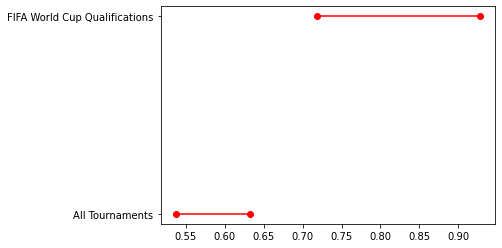

In [2305]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Tournaments']))

#### As shown in the graph above, Egypt has a higher/greater and long confidence interval therefore a greater probability of winning in FIFA World Cup Qualifications. Unlike in the world cup qualifications, in all tournaments all together, egypt has a lower and shorter confidence interval therefore a lower probability than that of the world cup qualifications but still higher than 0.5 which is not very low. The high probability of winning in the world cup qualifications could be explained by the fact that Egypt already occupies a high probability of winning a world cup qualification match; however, the number of world cup qualifications alone is insignificant compared to the number of matches Egypt played in all other tournaments, and, logically, when the number of matches is greater this means that the number of losses increases which impacts the overall probability of winning. 

### **Probability of Egypt Winning/Losing/having a draw in a Friendly match vs. an Offical match**

In [2306]:
Egypt.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
1463,2/19/1932,Egypt,Hungary,0,0,Friendly,Cairo,Egypt,False,draw
1661,3/16/1934,Egypt,Israel,7,1,FIFA World Cup qualification,Cairo,Egypt,False,win
1895,6/19/1936,Egypt,Greece,3,1,Friendly,Cairo,Egypt,False,win
2927,12/24/1948,Egypt,Norway,1,1,Friendly,Cairo,Egypt,False,draw
3080,2/17/1950,Egypt,Greece,2,0,Friendly,Cairo,Egypt,False,win


In [2307]:
conditions = [
    (Egypt['tournament']=='Friendly'),
    (Egypt['tournament']!='Friendly') ]

In [2308]:
values=['Friendly','Official']

In [2309]:
Egypt_typematch=Egypt['typematch'] = np.select(conditions, values)
print(Egypt_typematch)

['Friendly' 'Official' 'Friendly' 'Friendly' 'Friendly' 'Friendly'
 'Official' 'Friendly' 'Friendly' 'Friendly' 'Friendly' 'Friendly'
 'Friendly' 'Friendly' 'Friendly' 'Friendly' 'Official' 'Friendly'
 'Friendly' 'Official' 'Official' 'Official' 'Official' 'Official'
 'Official' 'Official' 'Official' 'Official' 'Official' 'Official'
 'Official' 'Official' 'Official' 'Official' 'Official' 'Official'
 'Official' 'Official' 'Official' 'Official' 'Official' 'Official'
 'Official' 'Official' 'Official' 'Friendly' 'Friendly' 'Friendly'
 'Friendly' 'Official' 'Friendly' 'Official' 'Friendly' 'Friendly'
 'Friendly' 'Friendly' 'Friendly' 'Official' 'Friendly' 'Friendly'
 'Friendly' 'Friendly' 'Friendly' 'Official' 'Official' 'Friendly'
 'Friendly' 'Friendly' 'Friendly' 'Official' 'Official' 'Official'
 'Official' 'Official' 'Official' 'Official' 'Official' 'Official'
 'Official' 'Official' 'Official' 'Official' 'Official' 'Official'
 'Official' 'Friendly' 'Friendly' 'Official' 'Friendly' 'Frien

/var/folders/9q/fl3yp7ld2v509vxm_rdry_8r0000gn/T/ipykernel_1060/169254995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Egypt_typematch=Egypt['typematch'] = np.select(conditions, values)


In [2310]:
Egypt['typematch'].value_counts()

Official    226
Friendly    181
Name: typematch, dtype: int64

In [2311]:
x=pd.crosstab(Egypt['typematch'],Egypt['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,37,45,99,181
Official,40,47,139,226
All,77,92,238,407


In [2312]:
x=np.array(x)
x

array([[ 37,  45,  99, 181],
       [ 40,  47, 139, 226],
       [ 77,  92, 238, 407]])

### **Confidence Interval of Probability of Egypt Winning a Friendly Match**

In [2313]:
CI_Egypt_Win_Friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_Egypt_Win_Friendly

(0.4744418341319208, 0.619480817801781)

#### When applied on future data, Egypt has a probability between (0.4744418341319208, 0.619480817801781) of winning a friendly match.

### **Confidence Interval of Probability of Egypt Winning an Official Match**

In [2314]:
CI_Egypt_Win_Official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_Egypt_Win_Official

(0.5516058130564923, 0.6784826825187289)

#### When applied on future data, Egypt has a probability between (0.5516058130564923, 0.6784826825187289) of winning an official match.

### **Confidence Interval of Probability of Egypt Winning a Friendly Match vs an Official Match**

In [2315]:
ci_egywin = {}
ci_egywin['Typematch'] = ['Friendly','Official']
ci_egywin['lb'] = [CI_Egypt_Win_Friendly[0],CI_Egypt_Win_Official[0]]
ci_egywin['ub'] = [CI_Egypt_Win_Friendly[1],CI_Egypt_Win_Official[1]]
df_ci= pd.DataFrame(ci_egywin)
df_ci

,Typematch,lb,ub
0,Friendly,0.474442,0.619481
1,Official,0.551606,0.678483


([<matplotlib.axis.YTick at 0x7f7eba6080a0>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

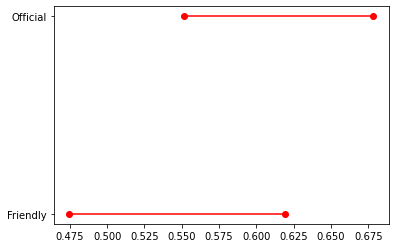

In [2316]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

#### As evident here, the confidence intervals of winning an official match and a friendly match intersect. This means that there is a high chance of Egypt having the same probability in both winning an official match and a friendly match. The only difference is that Egypt may have a chance higher than approximately 0.619480817801781 of winning an official match until 0.6784826825187289, while the probability of winning a friendly match has a max of 0.619480817801781; and the minimum probability of winning an official match has a minimum of 0.5516058130564923, while the minimum probability of winning a friendly match is 0.4744418341319208. In conclusion, this basically means that Egypt occupies a higher probability of winning an official match than a friendly match. The reason why Egypt might have a higher probability of winning an official match is that official matches most of the time are taken more seriously than friendly matches since the score matters the most in real tournaments. Added to that, the team captain usually experiments with different lineups during friendly matches and that might cause a  decline in performance than the usual performance with the usual lineup.

### **Probabilitiy of Egypt Winning at Home vs Winning Away**

In [2317]:
Egypt['home']=(Egypt['home_team']=='Egypt')

/var/folders/9q/fl3yp7ld2v509vxm_rdry_8r0000gn/T/ipykernel_1060/955588134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Egypt['home']=(Egypt['home_team']=='Egypt')


In [2318]:
Egypt['home'].value_counts()

True     258
False    149
Name: home, dtype: int64

In [2319]:
Egypt

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,typematch,home
1463,2/19/1932,Egypt,Hungary,0,0,Friendly,Cairo,Egypt,False,draw,Friendly,True
1661,3/16/1934,Egypt,Israel,7,1,FIFA World Cup qualification,Cairo,Egypt,False,win,Official,True
1895,6/19/1936,Egypt,Greece,3,1,Friendly,Cairo,Egypt,False,win,Friendly,True
2927,12/24/1948,Egypt,Norway,1,1,Friendly,Cairo,Egypt,False,draw,Friendly,True
3080,2/17/1950,Egypt,Greece,2,0,Friendly,Cairo,Egypt,False,win,Friendly,True
...,...,...,...,...,...,...,...,...,...,...,...,...
42590,9/1/2021,Egypt,Angola,1,0,FIFA World Cup qualification,Cairo,Egypt,False,win,Official,True
42758,9/30/2021,Egypt,Liberia,2,0,Friendly,Alexandria,Egypt,False,win,Friendly,True
42812,10/8/2021,Egypt,Libya,1,0,FIFA World Cup qualification,Alexandria,Egypt,False,win,Official,True
42958,11/12/2021,Djibouti,Algeria,0,4,FIFA World Cup qualification,Cairo,Egypt,True,lose,Official,False


In [2320]:
x=pd.crosstab(Egypt['home'],Egypt['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
False,33,49,67,149
True,44,43,171,258
All,77,92,238,407


In [2321]:
u=np.array(x)


In [2322]:
u

array([[ 33,  49,  67, 149],
       [ 44,  43, 171, 258],
       [ 77,  92, 238, 407]])

### **Probability of Egypt Winning at Home**

In [2323]:
CI_Egy_Win_Home=proportion_confint(count=u[1,2],nobs=u[1,3],alpha=(1-.95))
CI_Egy_Win_Home

(0.6051039288730269, 0.7204774664758102)

#### This confidence interval shows that the probability of Egypt winning a match at home lies between (0.6051039288730269, 0.7204774664758102). 

### **Probability of Egypt Winning Away**

In [2324]:
CI_Egy_Win_Away=proportion_confint(count=u[0,2],nobs=u[0,3],alpha=(1-.95))
CI_Egy_Win_Away

(0.3697890350639206, 0.5295398239964821)

#### This confidence interval shows that the probability of Egypt winning a match away lies between (0.3697890350639206, 0.5295398239964821). 

### **Confidence Interval of Probability of Egypt Winning at home vs away**

In [2325]:
ci_egywin = {}
ci_egywin['home'] = ['Yes','No']
ci_egywin['lb'] = [CI_Egy_Win_Home[0],CI_Egy_Win_Away[0]]
ci_egywin['ub'] = [CI_Egy_Win_Home[1],CI_Egy_Win_Away[1]]
df_ci= pd.DataFrame(ci_egywin)
df_ci

,home,lb,ub
0,Yes,0.605104,0.720477
1,No,0.369789,0.529540


([<matplotlib.axis.YTick at 0x7f7ebbf58d60>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

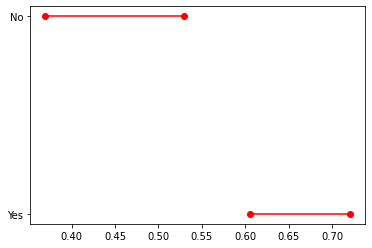

In [2326]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

#### This graph shows the confidence intervals of Egypt winning at home and away. As evident and shown in the graph, Egypt has a higher probability of winning a match at home. This could be explained by the fact that traveling distances to away lands are likely to cause fatigue, a decrease in sleep quality, and hydration. Moreover, Referees have been proven to subconsciously favor the home side. The atmosphere can be hostile when a team is away from its people. Also, the change in weather may be a huge factor, since a player's body is usually accustomed to the weather of his homeland or the place he lives in.


### **Non-neutral and Neutral Venues Egypt**

In [2327]:
df_Noneutral_Egypt=df_noneutral[df_noneutral['country']=='Egypt']

In [2328]:
df_Noneutral_Egypt

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
1463,2/19/1932,Egypt,Hungary,0,0,Friendly,Cairo,Egypt,False,draw
1661,3/16/1934,Egypt,Israel,7,1,FIFA World Cup qualification,Cairo,Egypt,False,win
1895,6/19/1936,Egypt,Greece,3,1,Friendly,Cairo,Egypt,False,win
2927,12/24/1948,Egypt,Norway,1,1,Friendly,Cairo,Egypt,False,draw
3080,2/17/1950,Egypt,Greece,2,0,Friendly,Cairo,Egypt,False,win
...,...,...,...,...,...,...,...,...,...,...
42165,3/29/2021,Egypt,Comoros,4,0,African Cup of Nations qualification,Cairo,Egypt,False,win
42590,9/1/2021,Egypt,Angola,1,0,FIFA World Cup qualification,Cairo,Egypt,False,win
42758,9/30/2021,Egypt,Liberia,2,0,Friendly,Alexandria,Egypt,False,win
42812,10/8/2021,Egypt,Libya,1,0,FIFA World Cup qualification,Alexandria,Egypt,False,win


### **Probability of Egypt Winning/Losing/Drawing a match in Neutral Conditions**

In [2329]:
df_Neutral_Egypt=df_neutral[df_neutral['country']=='Egypt']

In [2330]:
df_Neutral_Egypt['result'].value_counts(normalize=True)

win     0.449664
lose    0.328859
draw    0.221477
Name: result, dtype: float64

In [2331]:
x=df_Neutral_Egypt['result'].value_counts()
x=np.array(x)
x

array([67, 49, 33])

In [2332]:
N=x.sum()
N

149

In [2333]:
CI_Egypt_Win_Neutral=proportion_confint(count=x[0],nobs=N,alpha=(1-.95))
CI_Egypt_Win_Neutral

(0.3697890350639206, 0.5295398239964821)

#### This code means that Egypt has a probability of winning on a neutral venue that lies in the (0.3697890350639206, 0.5295398239964821) interval.

In [2334]:
CI_Egypt_Lose_Neutral=proportion_confint(count=x[1],nobs=N,alpha=(1-.95))
CI_Egypt_Lose_Neutral

(0.25342513144684364, 0.40429298935852553)

#### This code means that Egypt has a probability of losing on a neutral venue that lies in the (0.25342513144684364, 0.40429298935852553) interval.

In [2335]:
CI_Egypt_Draw_Neutral=proportion_confint(count=x[2],nobs=N,alpha=(1-.95))
CI_Egypt_Draw_Neutral

(0.15480279527394458, 0.28815022486028363)

#### This code means that Egypt has a probability of drawing on a neutral venue that lies in the (0.15480279527394458, 0.28815022486028363) interval.

### **Probability of Egypt Winning/Losing/Drawing a match in Non-Neutral Conditions**

In [2336]:
df_Noneutral_Egypt['result'].value_counts(normalize=True)

win     0.662791
draw    0.170543
lose    0.166667
Name: result, dtype: float64

In [2337]:
x=df_Noneutral_Egypt['result'].value_counts()
x=np.array(x)
x

array([171,  44,  43])

In [2338]:
N=x.sum()
N

258

In [2339]:
CI_Egypt_Win_Noneutral=proportion_confint(count=x[0],nobs=N,alpha=(1-.95))
CI_Egypt_Win_Noneutral

(0.6051039288730269, 0.7204774664758102)

#### This code means that Egypt has a probability of winning on a non-neutral venue that lies in the (0.6051039288730269, 0.7204774664758102) interval.

In [2340]:
CI_Egypt_Lose_Noneutral=proportion_confint(count=x[1],nobs=N,alpha=(1-.95))
CI_Egypt_Lose_Noneutral

(0.12464907466317304, 0.2164361966546564)

#### This code means that Egypt has a probability of losing on a non-neutral venue that lies in the (0.12464907466317304, 0.2164361966546564) interval.

In [2341]:
CI_Egypt_Draw_Noneutral=proportion_confint(count=x[2],nobs=N,alpha=(1-.95))
CI_Egypt_Draw_Noneutral

(0.12119174183927744, 0.21214159149405587)

#### This code means that Egypt has a probability of drawing on a neutral venue that lies in the (0.12119174183927744, 0.21214159149405587) interval.

### **Probability of Egypt Winning on a Neutral vs. Non-neutral Venue**

In [2342]:
ci_egy_win_venue = {}
ci_egy_win_venue['Venue'] = ['Neutral','Noneutral']
ci_egy_win_venue['lb'] = [CI_Egypt_Win_Neutral[0],CI_Egypt_Win_Noneutral[0]]
ci_egy_win_venue['ub'] = [CI_Egypt_Win_Neutral[1],CI_Egypt_Win_Noneutral[1]]
df_ci_venue= pd.DataFrame(ci_egy_win_venue)
df_ci_venue

,Venue,lb,ub
0,Neutral,0.369789,0.529540
1,Noneutral,0.605104,0.720477


([<matplotlib.axis.YTick at 0x7f7ebc2caa60>,
 [Text(0, 0, 'Neutral'), Text(0, 1, 'Noneutral')])

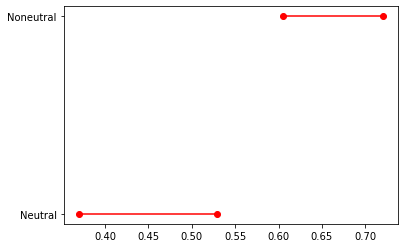

In [2343]:
for lb,ub,y in zip(df_ci_venue['lb'],df_ci_venue['ub'],range(len(df_ci_venue))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci_venue)),list(df_ci_venue['Venue']))

In [2344]:
Egypt['neutral'].value_counts()

False    258
True     149
Name: neutral, dtype: int64

#### The graph above shows the confidence intervals of winning in a non-neutral venue vs in a neutral venue. What is logical and expected is the probability of winning in a neutral venue to be higher than that of in a non-neutral venue. However, as shown in the graph, Egypt has a higher probability of winning in a non-neutral venue.This might show that the venue has no significance on the resulting score, since the probability of winning in a non-neutral venue is higher than that of a neutral venue, which is illogical. Or, as shown in the output of the code directly above, the number of matches played in a non-neutral venue is greater than the ones played in a neutral venue and this could explain the higher probability of winning in a non-neutral venue.

### **Conclusion** 

#### Egypt participated in the following tournaments: Friendlies, FIFA World Cup qualifications, African Cup of Nations qualifications, African Cup of Nations, Nile Basin Tournament, African Nations Championship, and UEFA Euro qualifications. Egypt had a 0.584767 probability of winning in all matches and all the tournaments it participated in this dataset. Egypt has a probability between (0.7189036274158941, 0.9281551961135176) of winning a match in The world cup qualifications. This might be due to the fact that Egypt is one of the most powerful African nations, therefore when The world cup qualifications are constructed Egypt usually has to face an African team after the drawing of lots, so, it occupies a high probability of winning. Egypt has a greater probability of winning in FIFA World Cup Qualifications than that in all tournaments. The high probability of winning in the world cup qualifications could be explained by the fact that Egypt already occupies a high probability of winning a world cup qualification match; however, the number of world cup qualifications alone is insignificant compared to the number of matches Egypt played in all other tournaments, and, logically, when the number of matches is greater this means that the number of losses increases which impacts the overall probability of winning. Egypt occupies a higher probability of winning an official match than a friendly match. The reason why Egypt might have a higher probability of winning an official match is that official matches most of the time are taken more seriously than friendly matches since the score matters the most in real tournaments. Added to that, the team captain usually experiments with different lineups during friendly matches and that might cause a  decline in performance than the usual performance with the usual lineup. Egypt has a higher probability of winning a match at home than away. This could be explained by the fact that traveling distances to away lands are likely to cause fatigue, a decrease in sleep quality, and hydration. Moreover, Referees have been proven to subconsciously favor the home side. The atmosphere can be hostile when a team is away from its people. Also, the change in weather may be a huge factor, since a player's body is usually accustomed to the weather of his homeland or the place he lives in. Egypt has a higher probability of winning in a non-neutral venue. This might show that the venue has no significance on the resulting score, since the probability of winning in a non-neutral venue is higher than that of a neutral venue, which is illogical. Or, the number of matches played in a non-neutral venue is greater than the ones played in a neutral venue and this could explain the higher probability of winning in a non-neutral venue.


# **Analysis of Corona Virus and Factors Impacting it** 

## **Abstract**

#### In this part I will compute the Case Fatality Rate for all countries. I will compute the Case Fatality Rate in Egypt and compare between 2020 and 2021. I will form a comparison between countries in different regions and find whether the region impacts the case fatality rate. I will examine whether a country's income level and population number impacts the case fatality rate.

## **Discussion**

### **Computing Case fatality rate** 

In [2345]:
df=pd.read_csv('covid_data.csv',encoding='latin-1')

In [2346]:
df.columns

Index(['date', 'iso3c', 'country', 'income', 'region', 'continent', 'dcases',
       'ddeaths', 'population', 'weekdays', 'month'],
      dtype='object')

In [2347]:
df['totcases'] = df.groupby(['iso3c'])['dcases'].cumsum()

In [2348]:
df['totdeaths'] = df.groupby(['iso3c'])['ddeaths'].cumsum()

In [2349]:
df['totdeaths'].loc[df['iso3c']=='EGY']

34049        0
34050        0
34051        0
34052        0
34053        0
         ...  
34731    21639
34732    21667
34733    21695
34734    21727
34735    21752
Name: totdeaths, Length: 687, dtype: int64

In [2350]:
df['cfr']=df['totdeaths']/df['totcases']

In [2351]:
df

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,totcases,totdeaths,cfr
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb,5,0,0.000000
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb,5,0,0.000000
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb,5,0,0.000000
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb,5,0,0.000000
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb,5,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec,205455,4908,0.023888
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec,207554,4940,0.023801
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec,207554,4940,0.023801
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec,211734,4997,0.023600


## **Egypt**

In [2352]:
df_egy=df.loc[df['iso3c']=='EGY']
df_egy

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,totcases,totdeaths,cfr
34049,2020-02-14,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,1,0,100388073,Fri,Feb,1,0,0.000000
34050,2020-02-15,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,0,0,100388073,Sat,Feb,1,0,0.000000
34051,2020-02-16,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,0,0,100388073,Sun,Feb,1,0,0.000000
34052,2020-02-17,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,0,0,100388073,Mon,Feb,1,0,0.000000
34053,2020-02-18,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,0,0,100388073,Tue,Feb,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34731,2021-12-27,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,851,31,100388073,Mon,Dec,382194,21639,0.056618
34732,2021-12-28,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,809,28,100388073,Tue,Dec,383003,21667,0.056571
34733,2021-12-29,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,854,28,100388073,Wed,Dec,383857,21695,0.056518
34734,2021-12-30,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,871,32,100388073,Thu,Dec,384728,21727,0.056474


In [2353]:
import matplotlib.pyplot as plt

In [2354]:
df_egy['date'] = pd.to_datetime(df_egy['date'],format='%Y-%m-%d')

/var/folders/9q/fl3yp7ld2v509vxm_rdry_8r0000gn/T/ipykernel_1060/3233637083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_egy['date'] = pd.to_datetime(df_egy['date'],format='%Y-%m-%d')


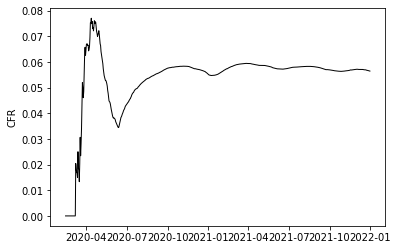

In [2355]:
plt.plot( 'date', 'cfr', data=df_egy,  color='black', markersize=4,     linewidth=1)
plt.xlabel("")
plt.ylabel("CFR")
plt.show()

#### The graph above portrays the case fatality rate in Egypt. Starting at the beginning of year 2020, Egypt had a 0% case fatality rate, meaning that no deaths were reported at that time and no cases as well, since at that time it was still the period before the beginning of covid. Then, starting 03-2020 there was a rise in the case fatality rate and it kept rising until nearly 06-2020. This is in fact true since in Egypt the number of cases at that time was very high and as a result the number of deaths too. At that time, the virus was still new so controlling the numbers was an issue, which explains the deaths. The highest value reached was between 0.07 and 0.08. Then, starting the end of june till July, there was a slight decrease in the rate. This could be explained by the implementation of a proper quarantine at that time, which somewhat controlled the number of cases and the number of deaths as a result. Then, starting the end of the year 2020 towards the beginning of the year 2021, there was a gradual rise in the number of cases and deaths. This could be explained by the emergence of the Omicron Variant and the end of the quarantine period, which cause the rise in cases and deaths.Ever since, there has been a somewhat steady rate of cases and deaths.

In [2356]:
from pandas.api.types import CategoricalDtype
cats=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['month'] = df['month'].astype(cat_type)

In [2357]:
dfegy=df[df['country']=='Egypt']

In [2358]:
import numpy as np

In [2359]:
stats=dfegy.groupby("month").agg({"dcases": [np.mean, np.std, np.size]})

In [2360]:
stats=pd.DataFrame(stats)

In [2361]:
stats.columns=['mean','std','size']

In [2362]:
def get_ci_lb(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [2363]:
x=dfegy['dcases']

In [2364]:
def get_ci_ub(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [2365]:
ci_dcases=statsm=dfegy.groupby("month").agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

In [2366]:
statsm.columns=['mean','std','size','lb','ub']

In [2367]:
statsm['month']=statsm.index

In [2368]:
import matplotlib.pyplot as plt

In [2369]:
df['date'] = pd. to_datetime(df['date'],format='%Y-%m-%d')

In [2370]:
df['year'] = pd. DatetimeIndex(df['date']). year

In [2371]:
statsdcases=df.groupby(['country','year','month']).agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

In [2372]:
statsdcases=statsdcases.reset_index()

In [2373]:
statsEgy=statsdcases[(statsdcases['country']=='Egypt') & (statsdcases['year']==2021)]

In [2374]:
statsEgy.columns=['country','year','month','mean','std','size','lb','ub']

In [2375]:
ci_lb_ub=[statsEgy['lb'],statsEgy['ub']]

In [2376]:
err = np.abs(ci_lb_ub - statsEgy['mean'].to_numpy())

In [2377]:
statsEgy21=statsdcases[(statsdcases['country']=='Egypt')
                       & (statsdcases['year']==2021)]

In [2378]:
statsEgy20=statsdcases[(statsdcases['country']=='Egypt')
                       & (statsdcases['year']==2020)]

In [2379]:
statsEgy20.columns=['country','year','month','mean','std','size','lb','ub']

In [2380]:
statsEgy21.columns=['country','year','month','mean','std','size','lb','ub']

In [2381]:
x=statsEgy20['month']

In [2382]:
y1=statsEgy20['mean']

In [2383]:
y2=statsEgy21['mean']

In [2384]:
ci_lb_ub20=[statsEgy20['lb'],statsEgy20['ub']]
err20 = np.abs(ci_lb_ub20 - statsEgy20['mean'].to_numpy())

In [2385]:
ci_lb_ub21=[statsEgy21['lb'],statsEgy21['ub']]
err21 = np.abs(ci_lb_ub21 - statsEgy21['mean'].to_numpy())

In [2386]:
from matplotlib.transforms import Affine2D

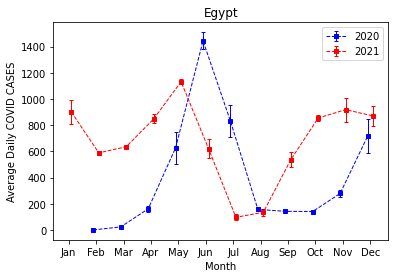

In [2387]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=err20, data=statsEgy20,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=err21, data=statsEgy21,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Egypt")
plt.show()

#### As apparent in the above graph, in 2020, Egypt reached its peak and experiened the highest number of daily covid cases, during the months may until mod july. However, during the other months the cases were low. In 2021, the cases were much higher all year long with a decrease only during june, july, and august, which is ironic since people during summer are usually always in contact with lots of other people. 

## **Comparison Between Countries in Different Regions**

In [2388]:
df_hungary=df.loc[df['country']=='Hungary']

In [2389]:
df_hungary

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,totcases,totdeaths,cfr,year
48775,2020-03-04,HUN,Hungary,High income,Europe & Central Asia,Europe,2,0,9769949,Wed,Mar,2,0,0.000000,2020
48776,2020-03-05,HUN,Hungary,High income,Europe & Central Asia,Europe,0,0,9769949,Thu,Mar,2,0,0.000000,2020
48777,2020-03-06,HUN,Hungary,High income,Europe & Central Asia,Europe,0,0,9769949,Fri,Mar,2,0,0.000000,2020
48778,2020-03-07,HUN,Hungary,High income,Europe & Central Asia,Europe,2,0,9769949,Sat,Mar,4,0,0.000000,2020
48779,2020-03-08,HUN,Hungary,High income,Europe & Central Asia,Europe,3,0,9769949,Sun,Mar,7,0,0.000000,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49438,2021-12-27,HUN,Hungary,High income,Europe & Central Asia,Europe,7989,436,9769949,Mon,Dec,1245319,38743,0.031111,2021
49439,2021-12-28,HUN,Hungary,High income,Europe & Central Asia,Europe,1370,151,9769949,Tue,Dec,1246689,38894,0.031198,2021
49440,2021-12-29,HUN,Hungary,High income,Europe & Central Asia,Europe,3005,115,9769949,Wed,Dec,1249694,39009,0.031215,2021
49441,2021-12-30,HUN,Hungary,High income,Europe & Central Asia,Europe,3361,95,9769949,Thu,Dec,1253055,39104,0.031207,2021


In [2390]:
df_hungary['date'] = pd.to_datetime(df_hungary['date'],format='%Y-%m-%d')

/var/folders/9q/fl3yp7ld2v509vxm_rdry_8r0000gn/T/ipykernel_1060/3269099244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hungary['date'] = pd.to_datetime(df_hungary['date'],format='%Y-%m-%d')


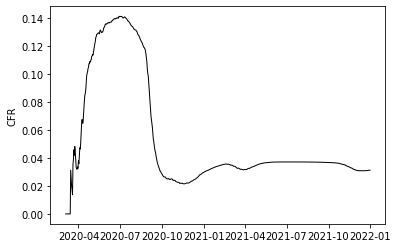

In [2391]:
plt.plot( 'date', 'cfr', data=df_hungary,  color='black', markersize=4,     linewidth=1)
plt.xlabel("")
plt.ylabel("CFR")
plt.show()

#### Starting 04-2020, Hungary started expriencing a rise in covid cases until 07-2020. It reached a 0.14 case fatality rate. Starting 07-2020 till 10-2020, there was a significant decrease to a 0.3 case fatality rate. Then, there was a slight rise till 0.4 that is constant until 01-2022. This all could be explained by the fact that starting 03-2020, the hungarian government ordered the gradual easing of lockdown measures. However, a month and a half later,  the government lifted  all coronavirus restrictions and officially ended a state of emergency, which didnt control the cases and tha fatalities. The hungarian government had a dissmissive attitude towards the conflict and when there was a rise in cases the government did not introduce measures to protect people and there there was no mask mandate and no mass testing. 

In [2392]:
df_china=df.loc[df['country']=='China']
df_china

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,totcases,totdeaths,cfr,year
21405,2020-01-22,CHN,China,Upper middle income,East Asia & Pacific,Asia,548,17,1397715000,Wed,Jan,548,17,0.031022,2020
21406,2020-01-23,CHN,China,Upper middle income,East Asia & Pacific,Asia,95,1,1397715000,Thu,Jan,643,18,0.027994,2020
21407,2020-01-24,CHN,China,Upper middle income,East Asia & Pacific,Asia,277,8,1397715000,Fri,Jan,920,26,0.028261,2020
21408,2020-01-25,CHN,China,Upper middle income,East Asia & Pacific,Asia,486,16,1397715000,Sat,Jan,1406,42,0.029872,2020
21409,2020-01-26,CHN,China,Upper middle income,East Asia & Pacific,Asia,669,14,1397715000,Sun,Jan,2075,56,0.026988,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22110,2021-12-27,CHN,China,Upper middle income,East Asia & Pacific,Asia,371,0,1397715000,Mon,Dec,114164,4852,0.042500,2021
22111,2021-12-28,CHN,China,Upper middle income,East Asia & Pacific,Asia,203,0,1397715000,Tue,Dec,114367,4852,0.042425,2021
22112,2021-12-29,CHN,China,Upper middle income,East Asia & Pacific,Asia,221,0,1397715000,Wed,Dec,114588,4852,0.042343,2021
22113,2021-12-30,CHN,China,Upper middle income,East Asia & Pacific,Asia,208,0,1397715000,Thu,Dec,114796,4852,0.042266,2021


In [2393]:
df_china['date'] = pd.to_datetime(df_china['date'],format='%Y-%m-%d')

/var/folders/9q/fl3yp7ld2v509vxm_rdry_8r0000gn/T/ipykernel_1060/942122686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china['date'] = pd.to_datetime(df_china['date'],format='%Y-%m-%d')


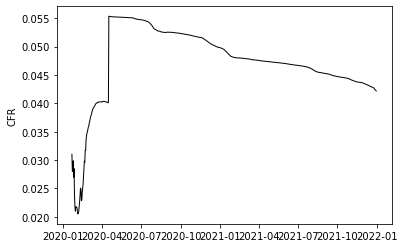

In [2394]:
plt.plot( 'date', 'cfr', data=df_china,  color='black', markersize=4,     linewidth=1)
plt.xlabel("")
plt.ylabel("CFR")
plt.show()

#### Starting 01-2020, China was the only country with a case this early. The case fatality rate started increasing from 02-2020 till 05-2020, to a rate of nearly 0.055 Then starting 05-2020 till 01-2022 there was a contant decrease to a rate of 0.040. This rate is pretty low compared to other countries. Despite it being the origin country for the virus, China has  managed to keep the death rates down. China was placed under a strict lockdown that lasted 76 days and public transport was suspended. Only one member of each household was permitted to leave the home every couple of days to collect necessary supplies. The level of strict measures prevented the virus from spreading so easily. 



#### The conclusion reached is that despite china, a country in Asia, being the primary source of the virus, however, its case fatality rate compared to Hungary, a country in Europe, is significantly lower, implying that the region doesn't hold much significance as much as the implemented measures.

### **Does a country's income level impact the case fatality rate?**

In [2395]:
df_china['income']

21405    Upper middle income
21406    Upper middle income
21407    Upper middle income
21408    Upper middle income
21409    Upper middle income
                ...         
22110    Upper middle income
22111    Upper middle income
22112    Upper middle income
22113    Upper middle income
22114    Upper middle income
Name: income, Length: 710, dtype: object

In [2396]:
df_hungary['income']

48775    High income
48776    High income
48777    High income
48778    High income
48779    High income
            ...     
49438    High income
49439    High income
49440    High income
49441    High income
49442    High income
Name: income, Length: 668, dtype: object

#### As evident in the outputs above, China has an upper middle income while Hungary has a high income; however, china has managed to better control the virus. Therefore, the income level of a country isn't a primary factor as much as the implemented measures are. Of course, income is important, however, a country can have a very high income level and still fail to control the situation.

## **Does the population number impact the case fatality rate?**

In [2397]:
df_china['population']


21405    1397715000
21406    1397715000
21407    1397715000
21408    1397715000
21409    1397715000
            ...    
22110    1397715000
22111    1397715000
22112    1397715000
22113    1397715000
22114    1397715000
Name: population, Length: 710, dtype: int64

In [2398]:
df_UK=df.loc[df['country']=='United Kingdom']

In [2399]:
df_UK['population']

39491    66834405
39492    66834405
39493    66834405
39494    66834405
39495    66834405
           ...   
40187    66834405
40188    66834405
40189    66834405
40190    66834405
40191    66834405
Name: population, Length: 701, dtype: int64

In [2400]:
df_UK['date'] = pd.to_datetime(df_UK['date'],format='%Y-%m-%d')

/var/folders/9q/fl3yp7ld2v509vxm_rdry_8r0000gn/T/ipykernel_1060/108896636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UK['date'] = pd.to_datetime(df_UK['date'],format='%Y-%m-%d')


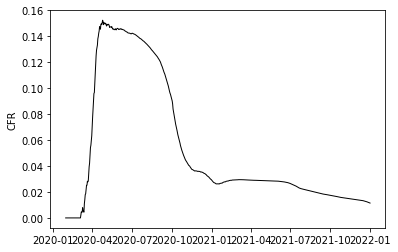

In [2401]:
plt.plot( 'date', 'cfr', data=df_UK,  color='black', markersize=4,     linewidth=1)
plt.xlabel("")
plt.ylabel("CFR")
plt.show()

#### Despite the population of the UK being 20 times smaller than China, the UK has 30 times as many Covid deaths. The UK reached a 0.16 case fatality rate while the maximum china reached was near 0.055. This shows that population size has no significance and effect on the case fatality rate as much as the effectiveness of the implemented measures and how the country deals with the conflict. 

## **Conclusion**

#### The conclusion reached is that despite china, a country in Asia, being the primary source of the virus, however, its case fatality rate compared to Hungary, a country in Europe, is significantly lower, implying that the region doesn't hold much significance as much as the implemented measures. China has an upper middle income while Hungary has a high income; however, China has managed to better control the virus. Therefore, the income level of a country isn't a primary factor as much as the implemented measures are. Of course, income is important, however, a country can have a very high-income level and still fail to control the situation. Despite the population of the UK being 20 times smaller than China, the UK has 30 times as many Covid deaths. The UK reached a 0.16 case fatality rate while the maximum china reached was near 0.055. This shows that population size has no significance and effect on the case fatality rate as much as the effectiveness of the implemented measures and how the country deals with the conflict. 